In [1]:
# The kmeans algorithm partitions data into k mutually exclusive clusters, and returns the index of the cluster
# to which it has assigned each observation. 
#
# Written by Dolu Obatusin

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial import distance
import time

In [3]:
def has_converged(cluster_new, cluster_old):
    return set([tuple(a) for a in cluster_new]) == set([tuple(a) for a in cluster_old])

# Randomly generate the sample data and centroids

def init_rand_gauss(mu,sigma, N):
    k = 3
    if mu is None:
        mu = 0
    if sigma is None:
        sigma = 0
    if N is None:
        N = 1024
 
    x1 = np.random.normal(mu,sigma + 0.2,[N,2])
    x2 = np.random.normal(mu + 2,sigma + 0.5,[N,2])
    x3 = np.random.normal(mu - 2,sigma + 0.5,[N,2])
    cluster_old = np.random.normal(mu,sigma,[k,2])
    cluster_new = np.random.normal(mu,sigma,[k,2])
    return x1,x2,x3,cluster_old,cluster_new

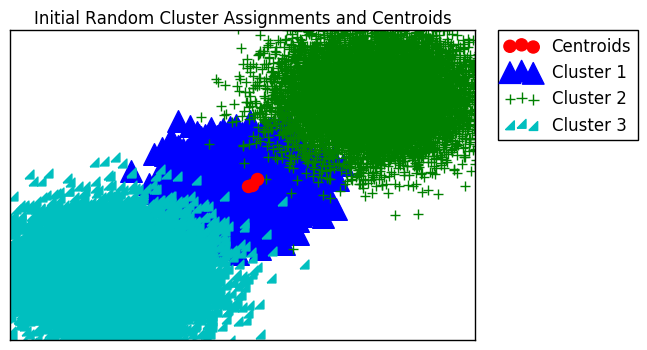

In [4]:
#original_fig (x1,x2,x3,cluster_old):
# Run init_rand_gauss function and plot data before running kmeans
x1,x2,x3,cluster_old,cluster_new = init_rand_gauss(0,0.2, 10000)
count = 0
fig, ax = plt.subplots()
s = 121

plt.scatter(cluster_old[:,0],cluster_old[:,1],s=75,color= 'r',  marker='o', zorder=1, label = "Centroids")
ax.scatter(x1[:,0], x1[:,1], color= 'b', s=2*s, marker='^',  zorder=-1, label = "Cluster 1")
ax.scatter(x2[:,0], x2[:,1], color= 'g',s=s/2, marker='+', zorder=-1, label = "Cluster 2")
verts = list(zip([-1., 1., 1., -1.], [-1., -1., 1., -1.]))
ax.scatter(x3[:,0], x3[:,1], color= 'c', s=s/3, marker=(verts, 0),  zorder=-1,label = "Cluster 3")



plt.title('Initial Random Cluster Assignments and Centroids')
# Place a legend to the right of the subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(-3.5, 3.5)
plt.xticks(())
plt.ylim(-3.5, 3.5)
plt.yticks(())
plt.show()
    

In [5]:
 # Find the euclidean distance between each cartesian data point and each cluster center
def Euclidean_distance(x1, x2, x3,cluster_old):
    Z = np.vstack([x1, x2, x3])
    n = len(Z)
    K = len(cluster_old)
    distVal = []
    distArray =  np.zeros((n , K))
    cluster_loc = np.zeros((n))
    for k in range(K):
        for i in range(len(Z)):
            distVal = distance.euclidean(Z[i],cluster_old[k])
            distArray[i,k] = distVal
    return Z,distArray

#Assign individual data points to closest cluster
def Cluster_Location(Z, cluster_old):
    n = len(Z)
    K = len(cluster_old)
    cluster_loc = np.zeros((n, K))
    for k in range(K):
        for i in range(len(Z)):
            loc = np.argmin(distArray[i,:])
            cluster_loc[i,loc]= 1
    return cluster_loc

def reevaluate_centers(cluster_loc, Z):
    index = np.where(cluster_loc==1)
    Z_x1 = Z[np.where(index[1] == 0)]
    Z_x2 = Z[np.where(index[1] == 1)]
    Z_x3 = Z[np.where(index[1] == 2)]
    cluster_old_x1 = np.apply_along_axis(lambda v: np.mean(v[np.nonzero(v)]), 0, Z_x1)
    cluster_old_x2 = np.apply_along_axis(lambda v: np.mean(v[np.nonzero(v)]), 0, Z_x2)
    cluster_old_x3 = np.apply_along_axis(lambda v: np.mean(v[np.nonzero(v)]), 0, Z_x3)
    # Compute new cluster centers by taking the average of points within each cluster
    cluster_new = np.vstack([cluster_old_x1, cluster_old_x2, cluster_old_x3])
    return cluster_new

cluster_old: [[  7.92452277e-02  -2.10277031e-02]
 [  2.23440057e-01   1.29890546e-01]
 [  1.47027519e-01   1.13179265e-04]]
cluster_new: [[-0.10395528 -0.11786933]
 [-0.0010619  -0.10133912]
 [ 0.00708527 -0.3717635 ]]
Iteration: 0


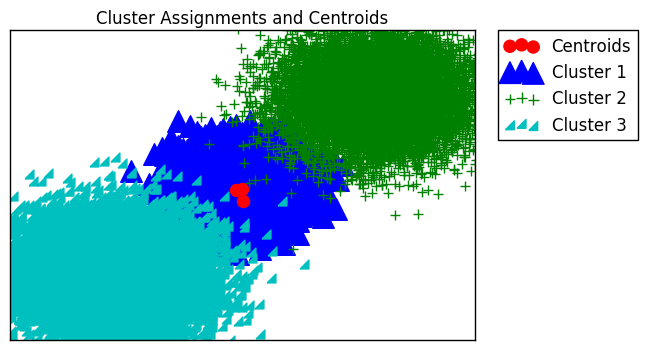

cluster_old: [[-0.10395528 -0.11786933]
 [-0.0010619  -0.10133912]
 [ 0.00708527 -0.3717635 ]]
cluster_new: [[-0.95475335 -0.18069625]
 [ 1.47249684  1.45546422]
 [-1.52014818 -1.79986765]]
Iteration: 1


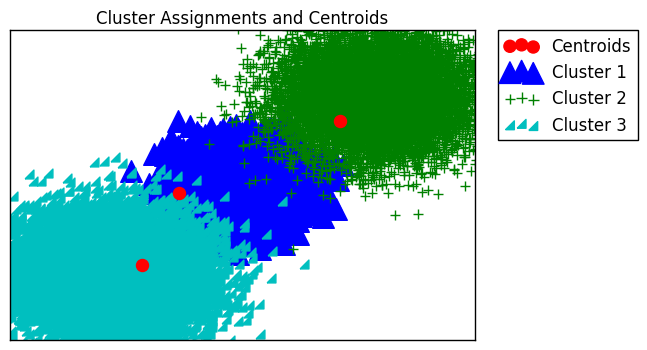

cluster_old: [[-0.95475335 -0.18069625]
 [ 1.47249684  1.45546422]
 [-1.52014818 -1.79986765]]
cluster_new: [[-0.11629835 -0.05658138]
 [ 1.90575948  1.88582931]
 [-2.03507233 -2.05529241]]
Iteration: 2


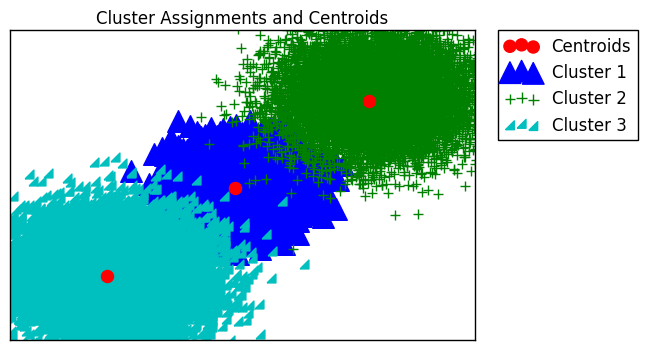

cluster_old: [[-0.11629835 -0.05658138]
 [ 1.90575948  1.88582931]
 [-2.03507233 -2.05529241]]
cluster_new: [[-0.01689191 -0.01053042]
 [ 2.02122232  2.0139874 ]
 [-2.04537806 -2.02748968]]
Iteration: 3


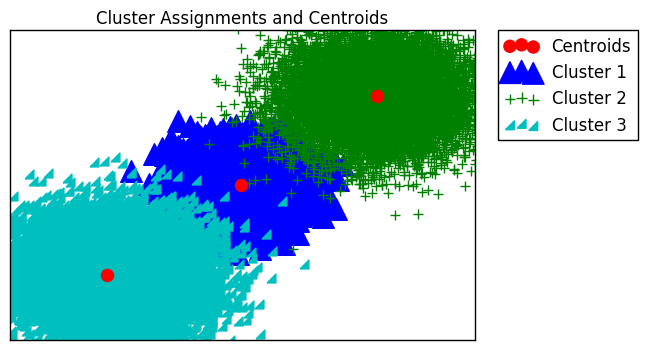

cluster_old: [[-0.01689191 -0.01053042]
 [ 2.02122232  2.0139874 ]
 [-2.04537806 -2.02748968]]
cluster_new: [[ -3.39597179e-03   1.52075650e-03]
 [  2.03140079e+00   2.02461150e+00]
 [ -2.04189611e+00  -2.02308279e+00]]
Iteration: 4


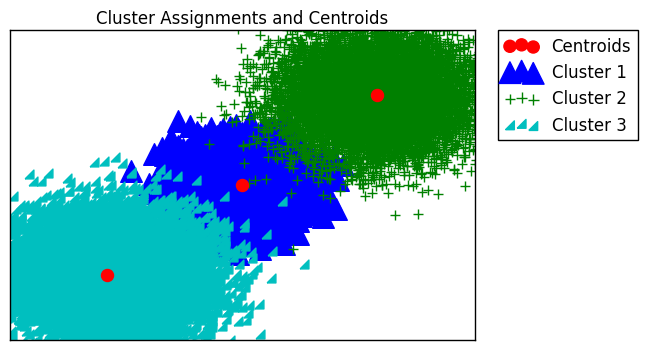

cluster_old: [[ -3.39597179e-03   1.52075650e-03]
 [  2.03140079e+00   2.02461150e+00]
 [ -2.04189611e+00  -2.02308279e+00]]
cluster_new: [[ -1.36033276e-03   2.76042839e-03]
 [  2.03238628e+00   2.02634838e+00]
 [ -2.04152200e+00  -2.02262619e+00]]
Iteration: 5


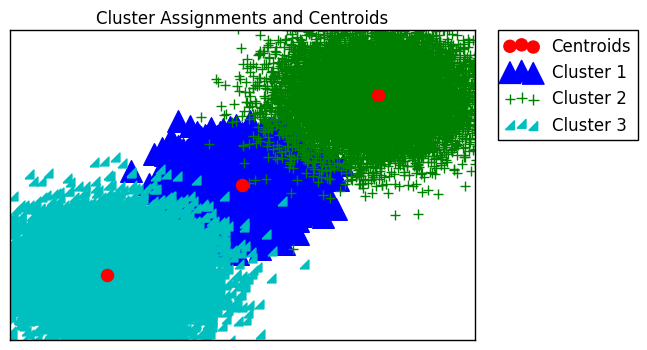

cluster_old: [[ -1.36033276e-03   2.76042839e-03]
 [  2.03238628e+00   2.02634838e+00]
 [ -2.04152200e+00  -2.02262619e+00]]
cluster_new: [[ -6.79458329e-04   3.43469580e-03]
 [  2.03284378e+00   2.02672356e+00]
 [ -2.04125003e+00  -2.02227360e+00]]
Iteration: 6


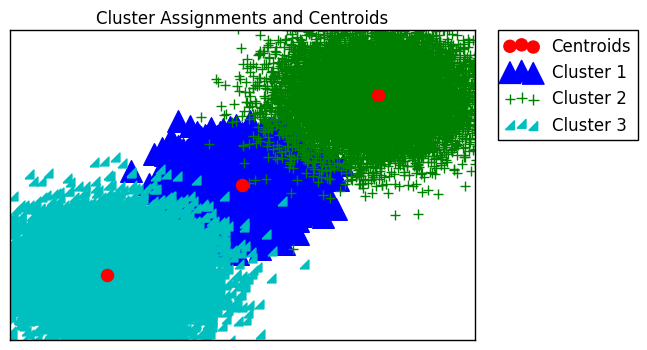

Time taken: 15 seconds
Good bye!


In [6]:
# Run Kmeans
count = 0
startTime = time.time()

while not has_converged(cluster_new, cluster_old):
    print ("cluster_old:",cluster_old)
    cluster_old = cluster_new
    print ("cluster_new:",cluster_new)
    
    Z,distArray = Euclidean_distance(x1, x2, x3,cluster_old)    

    cluster_loc = Cluster_Location(Z, cluster_old)   

    cluster_new = reevaluate_centers(cluster_loc, Z)

    # Run init_rand_gauss function and plot data after running kmeans
    # while not has_converged(cluster_new, cluster_old):

    fig, ax = plt.subplots()
    s = 121
    plt.scatter(cluster_old[:,0],cluster_old[:,1],s=75,color= 'r',  marker='o', zorder=1, label = "Centroids")
    ax.scatter(x1[:,0], x1[:,1], color= 'b', s=2*s, marker='^',  zorder=-1, label = "Cluster 1")
    ax.scatter(x2[:,0], x2[:,1], color= 'g',s=s/2, marker='+', zorder=-1, label = "Cluster 2")
    verts = list(zip([-1., 1., 1., -1.], [-1., -1., 1., -1.]))
    ax.scatter(x3[:,0], x3[:,1], color= 'c', s=s/3, marker=(verts, 0),  zorder=-1,label = "Cluster 3")
    print('Iteration:', count)
    count = count + 1
    
    plt.title('Cluster Assignments and Centroids')
    # Place a legend to the right of the subplot.
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlim(-3.5, 3.5)
    plt.xticks(())
    plt.ylim(-3.5, 3.5)
    plt.yticks(())
    plt.show()
    
print('Time taken: {} seconds'.format(round(time.time() - startTime)))   
print ("Good bye!")